In [1]:
import pandas as pd
import seaborn as sns
sns.reset_orig()

/Users/ulyana/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/ulyana/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [2]:
df = pd.read_csv('HR.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
df.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [5]:
df.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [6]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

In [8]:
df.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object

In [9]:
df.std()

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [10]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


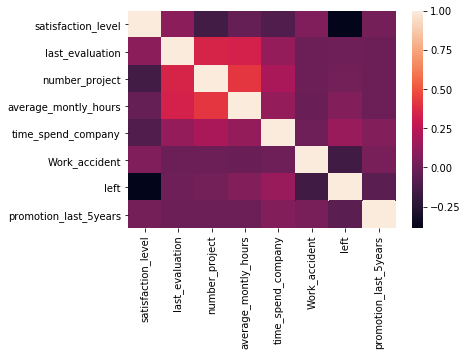

In [11]:
ax = sns.heatmap(df.drop(columns=['sales','salary']).corr())

4.Визуализировать несколько взаимосвязей между переменными.

/Users/ulyana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


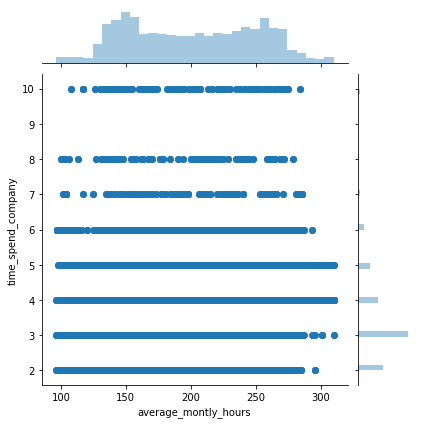

In [12]:
sns.jointplot(x="average_montly_hours", y="time_spend_company", data=df)

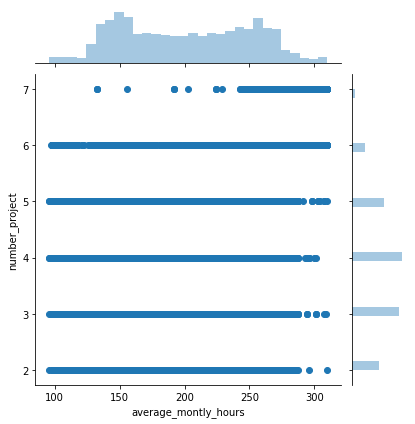

In [13]:
sns.jointplot(x="average_montly_hours", y="number_project", data=df)

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [14]:
import numpy as np
from scipy.stats import t

In [15]:
n=len(df)
t.sf(np.abs(df.average_montly_hours.mean()-df.time_spend_company.mean())/np.sqrt(
    (df.average_montly_hours.var()+df.time_spend_company.var())/n),2*n-2)*2

0.0

In [16]:
n=len(df)
t.sf(np.abs(df.number_project.mean()-df.average_montly_hours.mean())/np.sqrt(
    (df.number_project.var()+df.average_montly_hours.var())/n),2*n-2)*2

0.0

6.Рассчитать сколько работников работает в каждом департаменте.

In [17]:
df.groupby('number_project').count()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
number_project,,,,,,,,,
2,2388,2388,2388,2388,2388,2388,2388,2388,2388
3,4055,4055,4055,4055,4055,4055,4055,4055,4055
4,4365,4365,4365,4365,4365,4365,4365,4365,4365
5,2761,2761,2761,2761,2761,2761,2761,2761,2761
6,1174,1174,1174,1174,1174,1174,1174,1174,1174
7,256,256,256,256,256,256,256,256,256


7.Показать распределение сотрудников по зарплатам.

In [18]:
import matplotlib.pyplot as plt

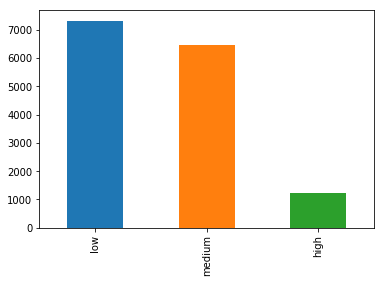

In [25]:
df.salary.value_counts().plot(kind='bar')

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

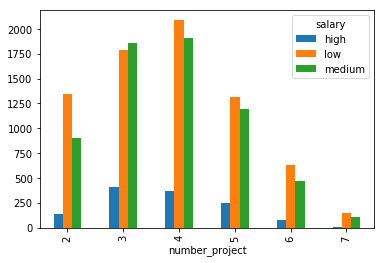

In [34]:
df.groupby('number_project').salary.value_counts().unstack().plot.bar()

9.Сколько сотрудников покинули компанию.

In [35]:
df[df.left == 1].count()

satisfaction_level       3571
last_evaluation          3571
number_project           3571
average_montly_hours     3571
time_spend_company       3571
Work_accident            3571
left                     3571
promotion_last_5years    3571
sales                    3571
salary                   3571
dtype: int64